In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import rescale
%matplotlib inline

#DEFAULT_IMAGE_SIZE = 77760
#DEFAULT_IMAGE_SIZE = 9520
DATA_DIR = 'yalefaces'
SCALE_PARAMETER = 0.35
IMAGE_LIMIT = 20

In [4]:
face_matrix = []
counter = 0
for file in os.listdir(DATA_DIR):
    image_path = os.path.join(DATA_DIR,file)
    image = np.asarray(Image.open(image_path))
    image = rescale(image,SCALE_PARAMETER,mode='reflect')
    image_vector = image.flatten()
    face_matrix.append(image_vector)
    counter += 1
    if counter>=IMAGE_LIMIT:
        break
        
image_shape = image.shape
face_matrix = np.array(face_matrix)

print(image.shape)
print(np.array(face_matrix).shape)

(85, 112)
(20, 9520)


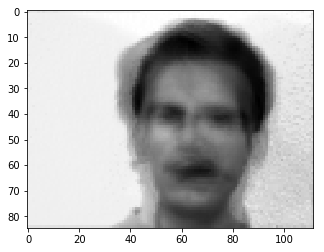

In [5]:
#print(type(face_matrix))
mean_face = face_matrix.mean(axis=0)
#print(type(mean_face[0]))
#print(mean_face.shape)
plt.imshow(mean_face.reshape(image_shape[0],image_shape[1]), cmap=plt.cm.gray)
for column in face_matrix:
    #print(column.shape)
    #print(type(column[0]))
    column = column.astype('float64')
    column -= mean_face

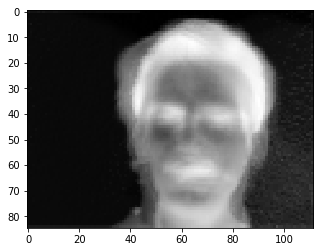

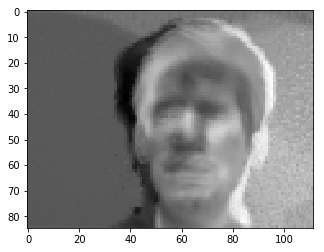

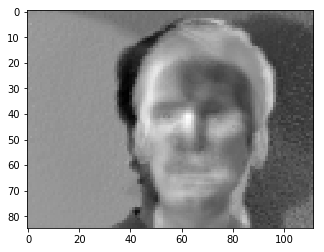

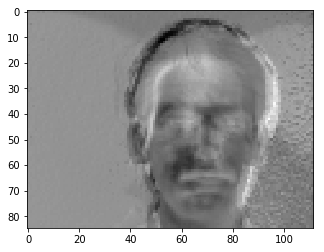

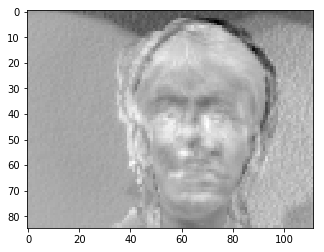

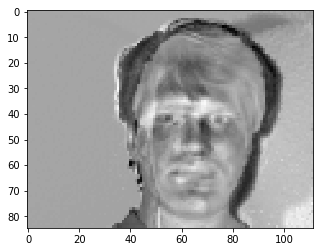

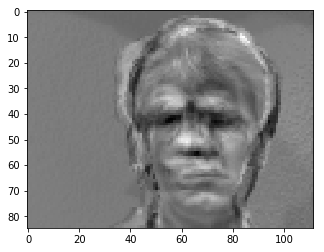

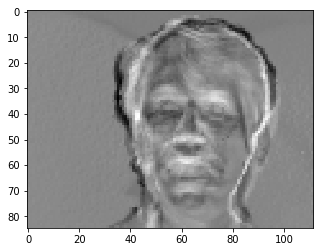

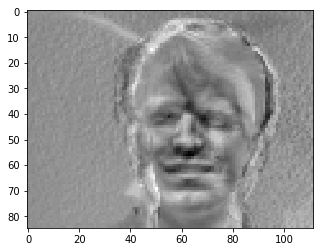

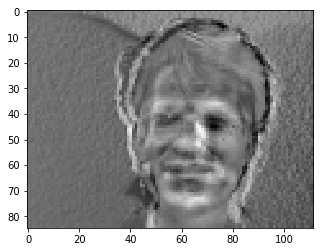

In [8]:
cov_face_matrix = np.dot(face_matrix.T,face_matrix)
u, s, v = np.linalg.svd(cov_face_matrix)
#print(s)
eigen_faces = v
counter = 0

for eigen_face in eigen_faces:
    if (counter<10):
        plt.figure()
        plt.imshow(eigen_face.reshape(image_shape[0],image_shape[1]), cmap=plt.cm.gray)
    counter+=1